In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf

## Checking tensorflow version

In [3]:
tf.__version__

'2.0.0'

## Mac OS problem
Mac OS 在同時執行 numpy, keras, 和 matplotlib 的時候會出現 OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized. 的錯誤，造成 kernel 死掉。google 後找到解答是要加上
<br>import os
<br>os.environ['KMP_DUPLICATE_LIB_OK']='True'
<br>就可以跑了
<br>參考答案：https://github.com/dmlc/xgboost/issues/1715

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
from tensorflow.keras.datasets import fashion_mnist as fm

In [6]:
(x_train, y_train), (x_test, y_test) = fm.load_data()

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Using interact to show fashion_mnist data

In [10]:
from ipywidgets import interact_manual

In [11]:
def show_data(n):
    plt.imshow(x_train[n], cmap = "Greys")
    print("This is a :", class_names[y_train[n]])

In [12]:
interact_manual(show_data, n=(0,59999))

interactive(children=(IntSlider(value=29999, description='n', max=59999), Button(description='Run Interact', s…

<function __main__.show_data(n)>

In [13]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Using interact to show the result of one-hot

In [16]:
def syt(n):
    print(y_train[n])
interact_manual(syt, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.syt(n)>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

## Changing the numbers of layers and neurons in the model
<br> I only added two layers with 100 and 30 neurons, resp. 

In [18]:
model = Sequential()

In [19]:
model.add(Dense(100, input_dim = 784, activation = "relu"))

In [20]:
model.add(Dense(30, activation = "relu"))

In [21]:
model.add(Dense(10, activation = "softmax"))

In [22]:
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


## Changing the epochs to 10 

In [24]:
model.fit(x_train, y_train, batch_size=25, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0836 - accuracy: 0.3216
Epoch 2/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0637 - accuracy: 0.5962
Epoch 3/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0501 - accuracy: 0.6592
Epoch 4/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0443 - accuracy: 0.6782
Epoch 5/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0408 - accuracy: 0.7051
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0381 - accuracy: 0.7412
Epoch 7/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0359 - accuracy: 0.7659
Epoch 8/10
60000/60000 [==============================] - 14s 235us/sample - loss: 0.0341 - accuracy: 0.7812
Epoch 9/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0325 - accuracy: 0.7912
Epo

In [25]:
result = model.predict_classes(x_test)

In [26]:
n = 8756
print('神經網路預測是:', class_names[result[n]])

神經網路預測是: T-shirt/top


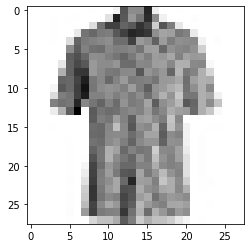

In [27]:
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

In [1]:
print('測試資料正確率：',acc)

NameError: name 'acc' is not defined